# Questão 1

FIltrar base de dados do Enem para resolução das questões e análise de resultados. Carregue-a para um dataframe.

In [1]:
import pandas as pd
db = pd.read_csv('base_dados.csv', encoding="cp1252")

# Questao 2 (OK)
Quais são os tipos de dados dos atributos (cf slides da aula sobre dados) disponíveis na base?

Atributo | Tipo do atributo
-------- | ----------------
NU_INSCRICAO | Qualitativo nominal
NU_ANO | Qualitativo nominal
TP_FAIXA_ETARIA | Qualitativo ordinal
TP_SEXO | Qualitativo binário simétrico
TP_ESTADO_CIVIL | Qualitativo nominal
TP_COR_RACA | Qualitativo nominal
TP_NACIONALIDADE | Qualitativo nominal
TP_ST_CONCLUSAO | Qualitativo ordinal
TP_ANO_CONCLUIU | Qualitativo ordinal (desconsiderando o valor 0)
TP_ESCOLA | Qualitativo nominal
TP_ENSINO | Qualitativo binário simétrico
IN_TREINEIRO | Qualitativo binário simétrico
CO_MUNICIPIO_ESC | Qualitativo nominal
NO_MUNICIPIO_ESC | Qualitativo nominal
CO_UF_ESC | Qualitativo nominal
SG_UF_ESC | Qualitativo nominal
TP_DEPENDENCIA_ADM_ESC | Qualitativo nominal
TP_LOCALIZACAO_ESC | Qualitativo binário simétrico
TP_SIT_FUNC_ESC | Qualitativo nominal
CO_MUNICIPIO_PROVA | Qualitativo nominal
NO_MUNICIPIO_PROVA | Qualitativo nominal
CO_UF_PROVA | Qualitativo nominal
SG_UF_PROVA | Qualitativo nominal
TP_PRESENCA_CN | Qualitativo nominal
TP_PRESENCA_CH | Qualitativo nominal
TP_PRESENCA_LC | Qualitativo nominal
TP_PRESENCA_MT | Qualitativo nominal
CO_PROVA_CN | Qualitativo nominal
CO_PROVA_CH | Qualitativo nominal
CO_PROVA_LC | Qualitativo nominal
CO_PROVA_MT | Qualitativo nominal
NU_NOTA_CN | Quantitativo
NU_NOTA_CH | Quantitativo
NU_NOTA_LC | Quantitativo
NU_NOTA_MT | Quantitativo
TX_RESPOSTAS_CN | Qualitativo nominal
TX_RESPOSTAS_CH | Qualitativo nominal
TX_RESPOSTAS_LC | Qualitativo nominal
TX_RESPOSTAS_MT | Qualitativo nominal
TP_LINGUA | Qualitativo nominal
TX_GABARITO_CN | Qualitativo nominal
TX_GABARITO_CH | Qualitativo nominal
TX_GABARITO_LC | Qualitativo nominal
TX_GABARITO_MT | Qualitativo nominal
TP_STATUS_REDACAO | Qualitativo nominal
NU_NOTA_COMP1 | Quantitativo
NU_NOTA_COMP2 | Quantitativo
NU_NOTA_COMP3 | Quantitativo
NU_NOTA_COMP4 | Quantitativo
NU_NOTA_COMP5 | Quantitativo
NU_NOTA_REDACAO | Quantitativo
Q001 | Qualitativo ordinal (desconsiderando o valor H)
Q002 | Qualitativo ordinal (desconsiderando o valor H)
Q003 | Qualitativo nominal
Q004 | Qualitativo nominal
Q005 | Quantitativo
Q006 | Qualitativo ordinal
Q007 | Qualitativo ordinal
Q008 | Qualitativo ordinal
Q009 | Qualitativo ordinal
Q010 | Qualitativo ordinal
Q011 | Qualitativo ordinal
Q012 | Qualitativo ordinal
Q013 | Qualitativo ordinal
Q014 | Qualitativo ordinal
Q015 | Qualitativo ordinal
Q016 | Qualitativo ordinal
Q017 | Qualitativo ordinal
Q018 | Qualitativo binário assimétrico
Q019 | Qualitativo ordinal
Q020 | Qualitativo binário assimétrico
Q021 | Qualitativo binário assimétrico
Q022 | Qualitativo ordinal
Q023 | Qualitativo binário assimétrico
Q024 | Qualitativo ordinal
Q025 | Qualitativo binário assimétrico

# Questao 3 (OK)

Quais são as cidades das escolas dos inscritos com dados disponíveis na base? 

In [2]:
cidades = db["NO_MUNICIPIO_ESC"].dropna().unique()
print(cidades)

['Salvador' 'Una' 'Lauro de Freitas' 'Candeias' 'Mata de São João'
 'Jaboatão dos Guararapes' 'Juazeiro' 'Eunápolis' 'Simões Filho'
 'Madre de Deus' 'Apuarema' 'Vera Cruz' 'Planalto' 'Serrinha' 'Camamu'
 'Itaberaba' 'Rio Verde' 'Remanso' 'Camaçari' 'Amargosa' 'Jequié'
 'Porto Seguro' 'São Sebastião do Passé' 'Caém' 'Ibicoara' 'Cafarnaum'
 'Pojuca' 'América Dourada' 'João Pessoa' 'Jaguaquara' 'Santa Inês'
 'Barreiras' 'Itaparica' 'Rio Real' 'Feira de Santana'
 'São Francisco do Conde' 'Serra Dourada' 'Presidente Tancredo Neves'
 'Salinas da Margarida' 'Vitória da Conquista' 'Bom Jesus da Lapa'
 'São Paulo' 'Palmas de Monte Alto' 'Teolândia' 'Ubaíra' 'Jaguarari'
 'Castanhal' 'Chã de Alegria' 'Paragominas' 'Duque de Caxias' 'Tapiramutá'
 'Itambé' 'Santa Bárbara' 'Santo Antônio de Jesus' 'Curitiba' 'Cotia'
 'Jandaíra' 'Ouricuri' 'Rio de Janeiro' 'Natal' 'Cícero Dantas'
 'Terra Nova' 'Fortaleza' 'Iramaia' 'Valença' 'Luís Eduardo Magalhães'
 'Paulo Afonso' 'Serra Preta' 'Senhor do Bonfim' 'J

Essas são as cidades de escolas disponíveis na base de dados filtrada.

#### Quais são as cidades de aplicação de provas com dados disponíveis na base? 

In [11]:
cidades_aplicacao = db["NO_MUNICIPIO_PROVA"].unique()
print(cidades_aplicacao)

['Salvador']


Esta é a única cidade de aplicação de prova presente na base filtrada. Isto ocorreu porque a filtragem foi realizada a com esse valor do respectivo atributo.

#### Quantos candidatos há nas cidades das escolas e nas cidades de aplicação? Compare e discuta os resultados.

In [13]:
print("Candidados por Cidade das escolas | ", dict(db.groupby("NO_MUNICIPIO_ESC").count().iloc[:, 1]))
print("Quantidade de Candidados que temos informação da cidade da escola:", sum(list(db.groupby("NO_MUNICIPIO_ESC").count().iloc[:, 1])))
print("Quantidade de Candidatos que não temos informação da cidade da escola:", len(db[db.get("NO_MUNICIPIO_ESC").isna()]))
print("A quantidade de valores dos Candidatos que informaram e não informaram é a mesma quantidade de valores do dataframe original? ", 'Sim' if db.iloc[:, 1].count() == sum(list(db.groupby("NO_MUNICIPIO_ESC").count().iloc[:, 1]))+len(db[db.get("NO_MUNICIPIO_ESC").isna()]) else 'Não')

Candidados por Cidade das escolas:  {'Amargosa': 1, 'América Dourada': 1, 'Apuarema': 1, 'Aracaju': 1, 'Barbacena': 1, 'Barreiras': 2, 'Bom Jesus da Lapa': 1, 'Cafarnaum': 2, 'Camamu': 1, 'Camaçari': 22, 'Candeias': 2, 'Castanhal': 1, 'Caém': 1, 'Chã de Alegria': 1, 'Cotia': 1, 'Curitiba': 2, 'Cícero Dantas': 1, "Dias d'Ávila": 1, 'Duque de Caxias': 3, 'Entre Rios': 1, 'Eunápolis': 3, 'Feira de Santana': 3, 'Fortaleza': 1, 'Ibicoara': 1, 'Iramaia': 1, 'Itaberaba': 2, 'Itambé': 1, 'Itaparica': 2, 'Jaboatão dos Guararapes': 1, 'Jaguaquara': 1, 'Jaguarari': 1, 'Jandaíra': 1, 'Jequié': 2, 'Jeremoabo': 1, 'João Pessoa': 4, 'Juazeiro': 3, 'Lauro de Freitas': 72, 'Luís Eduardo Magalhães': 2, 'Madre de Deus': 8, 'Maricá': 1, 'Marituba': 1, 'Mata de São João': 11, 'Natal': 1, 'Ouricuri': 1, 'Palmas de Monte Alto': 1, 'Paragominas': 7, 'Paulo Afonso': 1, 'Planalto': 1, 'Pojuca': 1, 'Porto Seguro': 2, 'Poções': 1, 'Presidente Tancredo Neves': 1, 'Remanso': 1, 'Rio Real': 1, 'Rio Verde': 1, 'Rio d

Como o critério escolhido foi a cidade de aplicação então sabe-se que todos os candidatos realizaram em Salvador.

In [45]:
print("Candidados por Cidade de aplicação: ", dict(db.groupby("NO_MUNICIPIO_PROVA").count().iloc[:, 1]))
print("Quantidade de Candidados que temos informação da cidade de aplicação:", sum(list(db.groupby("NO_MUNICIPIO_PROVA").count().iloc[:, 1])))
print("Quantidade de Candidatos que não temos informação da cidade de aplicação:", len(db[db.get("NO_MUNICIPIO_PROVA").isna()]))

Candidados por Cidade de aplicação:  {'Salvador': 54604}
Quantidade de Candidados que temos informação da cidade de aplicação: 54604
Quantidade de Candidatos que não temos informação da cidade de aplicação: 0


Dos 10033 candidatos que temos informação, 9773 são de Salvador, enquanto que os demais são oriundos de outras cidades, e por algum motivo fizeram as provas em Salvador, representando cerca de 2,5%. Esse fenômeno tende a ser cada vez mais comum em mundo globalizado e com menos barreiras de distâncias.

Pode ser observado que existem cerca de 4 vezes mais candidatos que não informaram a sua cidade do que os que informaram.

# Questao 4 (OK)
Escolha duas cidades das escolas. Para cada cidade, calcule a tendência central (média, mediana e/ou moda, conforme possibilidade) e desvio padrão de nota de redação para os inscritos. Que análise pode ser feita observando os valores obtidos?

In [2]:
db.get(['NO_MUNICIPIO_ESC','NU_NOTA_REDACAO']).dropna().NO_MUNICIPIO_ESC.value_counts()[:5]

NO_MUNICIPIO_ESC
Salvador            8131
Lauro de Freitas      48
Simões Filho          33
Camaçari              16
Mata de São João       7
Name: count, dtype: int64

As cidades escolhidas foram Salvador e Lauro de Freitas, as 2 cidades com maior numero de candidados. Removemos candidatos que não possuem nota disponível, e candidatos com nota igual à 0 são preservados. 

In [3]:
nota_redacao_salvador = db[db["NO_MUNICIPIO_ESC"] == "Salvador"].get(["NU_NOTA_REDACAO"])
nota_redacao_lauro = db[db["NO_MUNICIPIO_ESC"] == "Lauro de Freitas"].get(["NU_NOTA_REDACAO"])
print(f"Medidas de tendência central da nota de redação em Salvador: \n{nota_redacao_salvador.describe()} \nModa: {nota_redacao_salvador.value_counts().index[0]}\n")
print(f"Medidas de tendência central da nota de redação em Lauro de Freitas: \n{nota_redacao_lauro.describe()} \nModa: {nota_redacao_lauro.value_counts().index[0]}\n")

Medidas de tendência central da nota de redação em Salvador: 
       NU_NOTA_REDACAO
count      8131.000000
mean        666.525643
std         205.890067
min           0.000000
25%         560.000000
50%         700.000000
75%         820.000000
max         980.000000 
Moda: (880.0,)

Medidas de tendência central da nota de redação em Lauro de Freitas: 
       NU_NOTA_REDACAO
count        48.000000
mean        710.833333
std         214.494292
min           0.000000
25%         665.000000
50%         770.000000
75%         860.000000
max         940.000000 
Moda: (820.0,)



In [3]:
cv_salvador = (nota_redacao_salvador.std() / nota_redacao_salvador.mean()).iloc[0]
cv_lauro = (nota_redacao_lauro.std() / nota_redacao_lauro.mean()).iloc[0]
print(f'Coeficiente de variação:\nSalvador:{cv_salvador * 100:.05}\nLauro de Freitas: {cv_lauro * 100:.05}')

Coeficiente de variação:
Salvador:30.89
Lauro de Freitas: 30.175


array([[<Axes: title={'center': 'NU_NOTA_REDACAO'}>]], dtype=object)

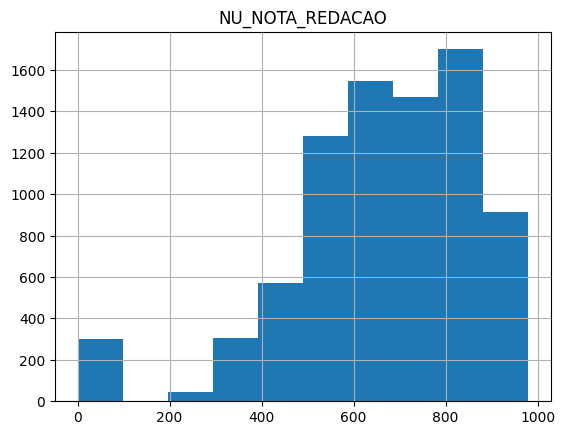

In [34]:
nota_redacao_salvador.hist(bins=10)

array([[<Axes: title={'center': 'NU_NOTA_REDACAO'}>]], dtype=object)

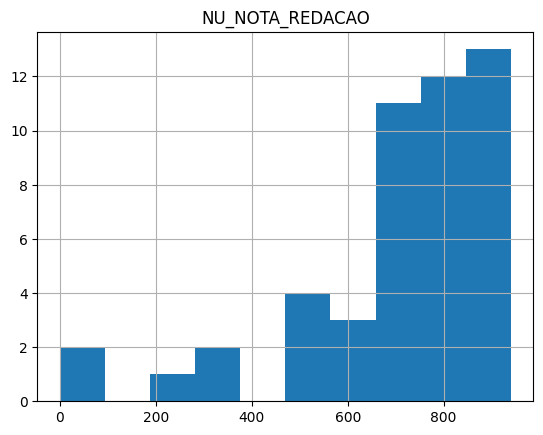

In [33]:
nota_redacao_lauro.hist(bins=10)

Ao realizar os cálculos de tendência central para as duas cidade foi possível perceber uma leve vantagem para Lauro de Freitas na nota de redação, mas, vale ressaltar que possui um número de amostras muito menor em relação à Salvador.

Ambas são distribuições assimétricas positivas ou à direita, uma vez que a moda é maior que a mediana, e esta, é maior que a média aritmética. 

Apesar da média aritmética e desvio padrão serem diferentes, ambos possuem coeficientes de variação bem próximos.

Ou seja, ambas as cidades não possuem diferença notável entre suas medidas de tendência central, mesmo com números de amostras bem distintos. Entretanto é possível perceber comportamentos diferentes ao plotarmos seus histogramas. 

# Questao 5 (OK)
Escolha uma cidade de escola, faça histogramas sobrepostos da nota de redação dos inscritos por sexo biológico. Faça o mesmo para nota de matemática. O que você observa? Comente.


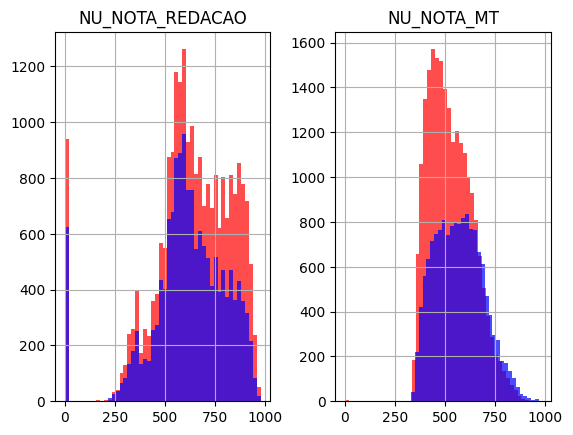

In [4]:
import matplotlib.pyplot as plt
for n, nota_prova in enumerate(['NU_NOTA_REDACAO', 'NU_NOTA_MT']):
    ax = plt.subplot(1, 2, n+1)
    db[db['TP_SEXO'] == 'F'].hist(column = nota_prova, bins = 50, ax = ax, alpha = 0.7, color = 'red')
    db[db['TP_SEXO'] == 'M'].hist(column = nota_prova, bins = 50, ax = ax, alpha = 0.7, color = 'blue')
    ax.set_title(nota_prova)

Os histogramas acima mostra no eixo Y o número de candidatos, e no eixo X a respectiva nota, a cor vermelha foi utilizada para representar o público feminino, e a cor azul o masculino. Através deles é possível perceber que existe um maior número de candidatos do sexo Feminino do que do sexo Masculino.
No primeiro histograma está sendo avaliada a nota de redação dos candidatos, no qual o sexo Feminino possui vantagem sobre o público masculino, apresentando melhores notas e maior número de pessoas. A maior nota teve presença dos dois sexos.
Já no segundo caso, o sexo masculino possui uma leve vantagem em relação as maiores notas, mesmo com o público feminino tendo maior presença no geral.

# Questao 6 (OK)
Crie um atributo de idade a partir do atributo de faixa etária (adote um critério para selecionar um valor de idade para cada faixa etária). 

Escolha uma cidade de escola, identifique as 10 faixas de renda familiar com maior número de inscritos. Escolha duas faixas de renda dentre estas. Para cada faixa de renda, determine para o atributo  idade, a mediana (Q2), assim como os quartis de 25% e 75% (Q1 e Q3), além de valores mínimo e máximo. O que você observa? Comente.


In [72]:
db_idade = db.copy()
idades = [None, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 33, 38, 43, 48, 53, 58, 63, 68, 71]
func = lambda idade_v : [idades[idade] for idade in idade_v]
db_idade['idade'] = func(db["TP_FAIXA_ETARIA"] )
faixas_renda = db_idade[db_idade['NO_MUNICIPIO_ESC'] == "Salvador"].get(['Q006']).value_counts()[:10]
faixas_renda

Q006
B       2658
C       1556
D       1058
E        637
G        560
H        551
A        439
F        392
Q        348
I        219
Name: count, dtype: int64

In [77]:
for renda in faixas_renda.index[:2]:
    print('para faixa de renda:',renda[0])
    display(db_idade[(db_idade['NO_MUNICIPIO_ESC'] == "Salvador") & (db_idade['Q006'] == renda[0])].get('idade').describe())

para faixa de renda: B


count    2658.000000
mean       18.708804
std         3.175260
min        16.000000
25%        17.000000
50%        18.000000
75%        19.000000
max        63.000000
Name: idade, dtype: float64

para faixa de renda: C


count    1556.000000
mean       18.237147
std         2.305243
min        16.000000
25%        17.000000
50%        18.000000
75%        19.000000
max        58.000000
Name: idade, dtype: float64

Foram escolhidas as duas primeiras faixas de renda com maior número de candidatos. Observamos que a idade de ambas as faixas de renda tem idades muito parecidas, obtendo valor bem próximo para a média e os mesmos valores mínimo, Q1, Q2 e Q3. tendo idade media em 18 anos, menor idade sendo na faixa etaria dos 16 anos, Q1 17, Q2 18 e Q3 19, porém para idade maxima na faixa de renda B esta na caso dos 63 anos e renda C na casa dos 58, no desvio padrao B: 3 anos e C: 2 anos.

Como parâmetro de definição de definição de idade pelas faixas, foi escolhido o valor médio entre os dois extremos de cada um, e para a primeira e para a última faixa foi escolhido o valor imediatamente antes e depois, respectivamente.

# Questao 7 (OK)

Escolha uma cidade (de escola), faça a tabela de contingência de número de inscritos entre o tipo de escola e o atributo raça/cor. O que você observa? Discuta.

In [49]:
db_escola_cor_raca = db.copy()

escolas = [None, 'Não Respondeu', 'Pública', 'Privada']
func = lambda escola_v : [escolas[escola] for escola in escola_v]
db_escola_cor_raca['escola'] = func(db["TP_ESCOLA"])

cores_racas = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
func1 = lambda cor_raca_v : [cores_racas[cor_raca] for cor_raca in cor_raca_v]
db_escola_cor_raca['cor_raca'] = func1(db["TP_COR_RACA"])

pd.crosstab(db_escola_cor_raca.escola,db_escola_cor_raca.cor_raca, margins = True, margins_name = 'Total')

cor_raca,Amarela,Branca,Indígena,Não declarado,Parda,Preta,Total
escola,,,,,,,
Não Respondeu,548,7492,110,750,16872,13854,39626
Privada,50,1894,7,95,1797,889,4732
Pública,222,1283,41,198,4328,4174,10246
Total,820,10669,158,1043,22997,18917,54604


Pelo tabela de contingência pode-se observar que a maioria dos candidatos de Escola Privada são da Cor/Raça Branca e Parda, enquanto que a Escola Pública possui um parcela significativa da Cor/Raça Preta e Parda. A maioria dos candidatos preferiram não informar a sua Escola, com a maioria destes sendo de Cor/Raça Preta e Parda. 

De forma geral, a maioria dos candidatos são da Cor/Raça Preta e Parda, um reflexo da população de Salvador, cidade escolhida na filtragem dos dados.

# Questao 8 (OK)
Escolha uma cidade (de escola) e duas provas do ENEM. Filtre somente os candidatos desta cidade, e faça um gráfico de dispersão das notas dos candidatos em uma prova (1º eixo) em relação às notas dos candidatos em outra prova (2º eixo). Observe o gráfico e calcule o coeficiente de correlação de Pearson. 

Repita para mudando a escolha de uma das provas do ENEM (mantenha a outra prova escolhida).


Grafico de dispersao usando metodo de pearson


,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC
NU_NOTA_CH,1.000000,0.626437,0.643865,0.735133
NU_NOTA_CN,0.626437,1.000000,0.625249,0.589423
NU_NOTA_MT,0.643865,0.625249,1.000000,0.594905
NU_NOTA_LC,0.735133,0.589423,0.594905,1.000000


<Axes: xlabel='NU_NOTA_CH', ylabel='NU_NOTA_LC'>

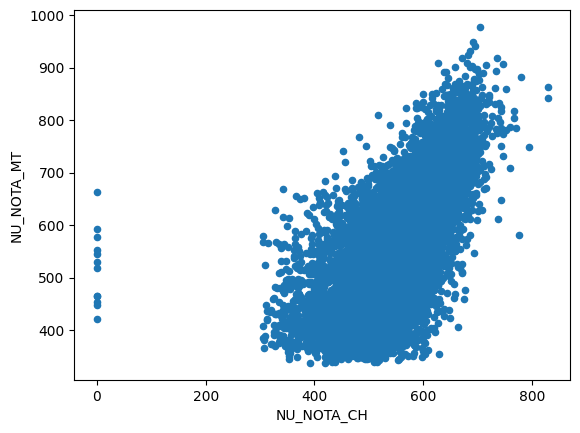

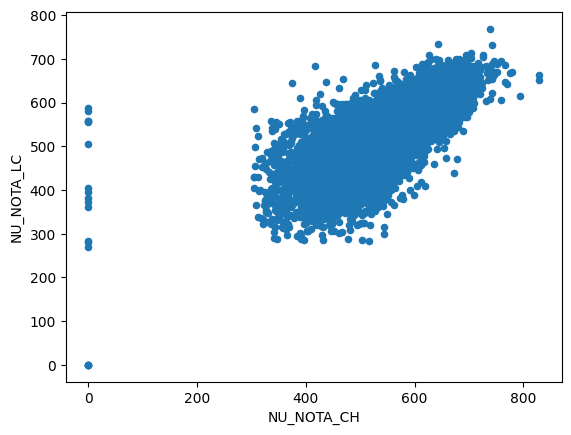

In [78]:
db_notas = db_idade[db_idade['NO_MUNICIPIO_ESC'] == "Salvador"].get(['NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_MT', 'NU_NOTA_LC'])
db_notas.plot.scatter(x='NU_NOTA_CH',y='NU_NOTA_MT')
print('Grafico de dispersao usando metodo de pearson')
display(db_notas.corr(method='pearson'))
db_notas.plot.scatter(x='NU_NOTA_CH',y='NU_NOTA_LC')

Em ambos os gráficos pode-se observar uma relação linear entre os 2 eixos, porém o segundo gráfico(NU_NOTA_CH x NU_NOTA_LC) mostra uma relação mais forte entre eles, como pode ser observado pela relação de pearson. Ou seja, de modo geral candidatos com maiores notas em NU_NOTA_CH apresentam melhores notas em NU_NOTA_LC.

Os pontos com nota 0 entende-se que sao pessoas que nao realizaram as provas.

# Questao 9 (OK)

Faça uma análise da relação entre renda mensal familiar e as notas nas provas do ENEM. Defina e justifique seu método de análise. Discuta os resultados.

In [79]:
print('Tabela com média de nota por prova para classe de renda:')
db_notas = db.get(['Q006','NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']).groupby('Q006').mean()
db_notas['Total'] = (db_notas['NU_NOTA_CH'] + db_notas['NU_NOTA_CN'] + db_notas['NU_NOTA_LC'] + db_notas['NU_NOTA_MT'] + db_notas['NU_NOTA_REDACAO'])/5
db_notas

Tabela com media de nota por prova para classe de renda


,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Total
Q006,,,,,,
A,515.525253,469.034323,495.243434,483.303737,478.281793,488.277708
B,563.350899,475.469919,508.632070,502.784826,496.051686,509.257880
C,598.276914,488.086528,523.846722,518.043413,520.755738,529.801863
D,625.392066,498.104110,533.813423,526.615844,535.033897,543.791868
E,654.101276,508.629023,545.878779,537.232857,553.831374,559.934662
F,674.641564,520.119076,556.998262,547.516437,570.322483,573.919565
G,700.062500,527.457774,565.879323,553.538802,588.786743,587.145028
H,723.046218,535.641900,574.616807,562.206092,597.158814,598.533966
I,734.846336,552.191811,580.022459,564.448936,617.401365,609.782181


<Axes: xlabel='Q006'>

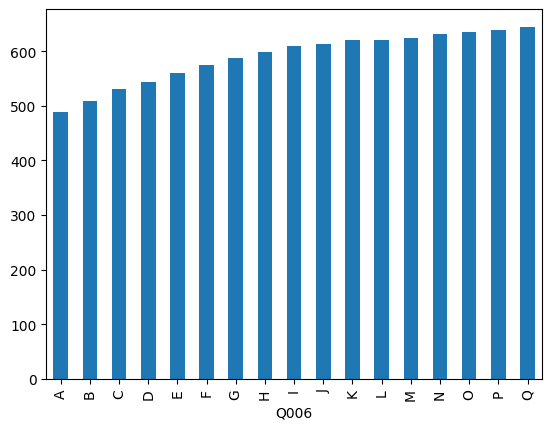

In [67]:

db_notas['Total'].plot.bar()

Para esta análise foram agrupados os candidatos de acordo com a renda familiar e calculado a média de cada uma das provas por agrupamento, levando em conta as 4 provas objetivas e a redação. Depois foi definida a nota media geral para cada agrupamento ou faixa de renda familiar, a partir das 5 médias de notas calculadas anteriormente.
Com a média geral de cada faixa de renda familiar foi feita a plotagem de um gráfico pelo qual possibilitou observar uma tendência, quanto maior a faixa de renda do candidato, maior a sua média geral.

A média foi escolhida pois representa de forma geral em um único valor a partir de uma grande gama de valores.

# Questao 10
Agora é com você, crie mais uma pergunta relevante (pense como um jornalista investigativo) que possa ser respondida com este conjunto de dados. Justifique a relevância de sua pergunta, faça sua análise de dados e discuta a sua resposta escrita.

Na época em que vivemos, o acesso à internet, computador e televisão é algo normal para a maioria da população, que não vive sem. Pensando nisso, esses acessos às tecnologias apresentam alguma contribuição na nota dos candidatos? O acesso à internet é um fator tão determinante assim para as notas?

In [8]:
db_notas = db.get(['Q025', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']).groupby('Q025').mean()
db_notas['Total'] = (db_notas['NU_NOTA_CH'] + db_notas['NU_NOTA_CN'] + db_notas['NU_NOTA_LC'] + db_notas['NU_NOTA_MT'] + db_notas['NU_NOTA_REDACAO']) / 5
db_notas

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Total
Q025,,,,,,
A,526.761730,471.975500,499.709706,489.003404,488.557750,495.201618
B,636.283732,504.467671,539.136059,530.380231,546.874482,551.428435


Na tabela acima tem-se A indicando que não tem acesso à internet e B indicando o acesso. Nele é possível perceber que para todas as provas a média das notas dos candidatos com acesso à internet é maior do que os que não possuem tal acesso. Vale descatar a nota de redação, possuindo a maior diferença entre as duas médias.

In [9]:
db_notas = db.get(['Q021', 'NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']).groupby('Q021').mean()
db_notas['Total'] = (db_notas['NU_NOTA_CH'] + db_notas['NU_NOTA_CN'] + db_notas['NU_NOTA_LC'] + db_notas['NU_NOTA_MT'] + db_notas['NU_NOTA_REDACAO']) / 5
db_notas

,NU_NOTA_REDACAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Total
Q021,,,,,,
A,608.941686,495.235407,529.178121,520.996674,530.017786,536.873935
B,702.650410,527.994493,563.421023,552.217890,590.072429,587.271249


Na tabela acima tem-se A indicando a ausência da TV por assinatura e B indicando a presença. Também é possível perceber o mesmo fenômeno da tabela anterior, na qual, a média do candidatos que contam com a presença de tal tecnologia é maior para todas as notas, em relação aos que não possuem.

In [11]:
pd.crosstab(db.Q006, db.Q025, margins = True, margins_name = 'Total')

Q025,A,B,Total
Q006,,,
A,884,2511,3395
B,1948,16241,18189
C,450,9185,9635
D,138,5811,5949
E,68,3357,3425
F,27,1809,1836
G,21,2386,2407
H,13,2379,2392
I,4,1034,1038


A partir dessa tabela de contingência é visto que a maior parcela da população que não tem acesso à internet está localizada nas faixas de renda mais baixas. Cerca de 92% dos que não possuem o acesso estão localizadas nas 3 faixas etárias mais baixas.

In [13]:
db_notas = db.get(['Q006', 'Q025', 'NU_NOTA_REDACAO','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']).groupby(['Q006', 'Q025']).mean()
db_notas['Total'] = (db_notas['NU_NOTA_CH'] + db_notas['NU_NOTA_CN'] + db_notas['NU_NOTA_LC'] + db_notas['NU_NOTA_MT'] + db_notas['NU_NOTA_REDACAO']) / 5
db_notas

NU_NOTA_REDACAO  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
Q006 Q025                                                                    
A    A          491.509054  465.184564  491.959759  474.117907  469.154586   
     B          523.573837  470.289497  496.343898  486.382198  481.257622   
B    A          525.218121  468.080874  494.945973  486.760403  482.897632   
     B          567.574096  476.277039  510.147803  504.559528  497.488530   
C    A          557.923875  476.447212  511.543945  504.777509  508.582528   
     B          600.137183  488.613274  524.413878  518.654969  521.306645   
D    A          539.080460  489.606329  513.759770  508.573563  520.727848   
     B          627.159332  498.269583  534.224029  526.985267  535.312472   
E    A          585.333333  515.165909  536.697778  503.626667  536.581818   
     B          655.318647  508.510318  546.041306  537.827773  554.144614   
F    A          547.272727  505.977273  532.650000  513.722727  533.109091   
     B          676.703458  520.358584  557.392421  548.063503  570.952733   
G    A          634.444444  511.327778  554.455556  548.844444  551.155556   
     B          700.683491  527.617741  565.987434  553.583228  589.159945   
H    A          620.000000  487.833333  546.871429  517.600000  525.433333   
     B          723.426463  535.799945  574.719188  562.370691  597.395923   
I    A          680.000000  597.150000  623.600000  642.500000  584.800000   
     B          734.976303  552.079975  579.919194  564.263981  617.482463   
J    A          860.000000  515.200000  570.400000  571.400000  689.066667   
     B          739.669173  546.728594  583.893534  569.587068  624.683906   
K    A          740.000000  535.000000  597.600000  575.500000  656.700000   
     B          752.164179  554.205447  591.221642  574.314552  631.204864   
L    A          770.000000  535.825000  551.225000  552.700000  604.575000   
     B          757.370753  552.616489  587.810931  573.484638  634.699084   
M    A          740.000000  581.166667  579.633333  572.800000  687.600000   
     B          756.726190  559.076741  589.410714  575.316964  637.062816   
N    A          480.000000  393.100000  413.700000  401.400000  406.700000   
     B          772.020548  561.008333  599.189384  579.760274  650.021631   
O    A          610.000000  560.750000  587.150000  560.000000  668.200000   
     B          780.765697  561.632917  598.367994  581.415008  654.635569   
P    A                 NaN         NaN         NaN         NaN         NaN   
     B          778.998384  571.498469  602.055250  584.180775  661.589456   
Q    A          880.000000  611.500000  590.200000  619.000000  706.500000   
     B          794.298441  568.591204  601.667595  586.329399  672.793287   

                Total  
Q006 Q025              
A    A     478.385174  
     B     491.569410  
B    A     491.580601  
     B     511.209399  
C    A     511.855014  
     B     530.625190  
D    A     514.349594  
     B     544.390137  
E    A     535.481101  
     B     560.368532  
F    A     526.546364  
     B     574.694140  
G    A     560.045556  
     B     587.406368  
H    A     539.547619  
     B     598.742442  
I    A     625.610000  
     B     609.744383  
J    A     641.213333  
     B     612.912455  
K    A     620.960000  
     B     620.622137  
L    A     602.865000  
     B     621.196379  
M    A     632.240000  
     B     623.518685  
N    A     418.980000  
     B     632.400034  
O    A     597.220000  
     B     635.363437  
P    A            NaN  
     B     639.664467  
Q    A     681.440000  
     B     644.735985

Através desses dados é possível perceber que o aumento da renda familiar tende em melhores notas e para candidados de uma mesma faixa de renda, os que tem acesso à internet, de maneira geral, têm uma média maior.

Dessa forma, entende-se que acesso à internet na residencia resulta em uma melhoria nas notas.